In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.6.1
    Uninstalling fsspec-2024.6.1:
      Successfully uninstalled fsspec-2024.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires 

In [ ]:
from datasets import load_dataset

ds = load_dataset("community-datasets/tamilmixsentiment")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/11335 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1260 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3149 [00:00<?, ? examples/s]

In [ ]:
ds

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 11335
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 1260
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 3149
    })
})

In [ ]:
train_ds = ds['train']

train_ds.to_pandas().head()

,text,label
0,Trailer late ah parthavanga like podunga,0
1,Move pathutu vanthu trailer pakurvnga yaru,0
2,Puthupetai dhanush ah yarellam pathinga,0
3,"Dhanush oda character ,puthu sa erukay , mass ta",0
4,vera level ippa pesungada mokka nu thalaivaaaaaa,0


In [ ]:
test_ds = ds['test']

test_ds.to_pandas().head()

,text,label
0,Yarayellam FDFS ppga ippove ready agitinga,0
1,Ennada viswasam mersal sarkar madhri time la l...,0
2,yuvan vera level ya .... valuable script. SK i...,0
3,70 vayasulayum thanoda rasigargala sandhosapad...,2
4,all the best anna...Telugu makkal selvan fans,0


In [ ]:
validatet_ds = ds['validation']

validatet_ds.to_pandas().head()

,text,label
0,Daily likes & views pakka vanthavaga ellarukum...,0
1,25 k dislikes ethuku da intha trailerku poi ap...,1
2,#Lyca unna nenacha pavama iruku ya,2
3,It looks like Hindi movie amitab bachan,0
4,Thalaivarukku nejamavey vayasaagiduchu... siva...,0


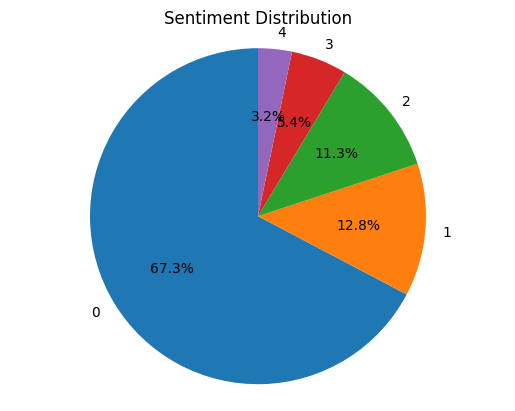

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd # Import pandas to use value_counts()

sentiment_counts = pd.Series(train_ds['label']).value_counts() # Convert list to pandas Series

# Creating the pie chart
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)

# Adding a title to the chart
plt.title('Sentiment Distribution')

# Ensuring the circle's proportion
_ = plt.axis('equal')

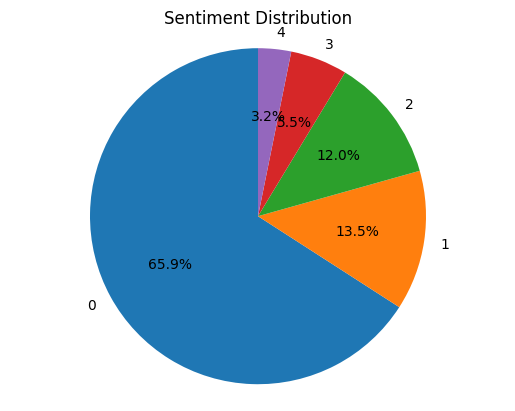

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd # Import pandas to use value_counts()

sentiment_counts = pd.Series(test_ds['label']).value_counts() # Convert list to pandas Series

# Creating the pie chart
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)

# Adding a title to the chart
plt.title('Sentiment Distribution')

# Ensuring the circle's proportion
_ = plt.axis('equal')

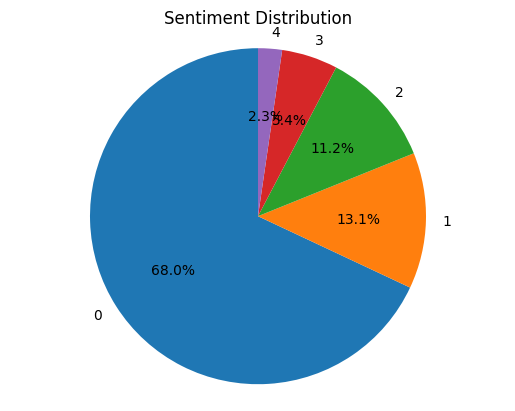

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd # Import pandas to use value_counts()

sentiment_counts = pd.Series(validatet_ds['label']).value_counts() # Convert list to pandas Series

# Creating the pie chart
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)

# Adding a title to the chart
plt.title('Sentiment Distribution')

# Ensuring the circle's proportion
_ = plt.axis('equal')

##Data pre-processing

In [ ]:
import pandas as pd
train_df = pd.DataFrame(train_ds)
missing_values = train_df.isnull().sum()
print(missing_values)

text     0
label    0
dtype: int64


In [ ]:
test_df = pd.DataFrame(test_ds)
missing_values = test_df.isnull().sum()
print(missing_values)

text     0
label    0
dtype: int64


In [ ]:
val_df = pd.DataFrame(validatet_ds)
missing_values = val_df.isnull().sum()
print(missing_values)

text     0
label    0
dtype: int64


In [ ]:
train_df.shape

(11335, 2)

In [ ]:
test_df.shape

(3149, 2)

In [ ]:
val_df.shape

(1260, 2)

In [ ]:
import re

def clean_text(text):
    #text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\b[a-zA-Z]\b', " ", text)
    text = re.sub(r"<[^>]*>", " ", text)
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text

In [ ]:
#to remove things mentioned in prev one
text = train_df['text'].apply(clean_text)

In [ ]:
text = test_df['text'].apply(clean_text)

In [ ]:
text = val_df['text'].apply(clean_text)

In [ ]:
train_df

,text,label
0,Trailer late ah parthavanga like podunga,0
1,Move pathutu vanthu trailer pakurvnga yaru,0
2,Puthupetai dhanush ah yarellam pathinga,0
3,"Dhanush oda character ,puthu sa erukay , mass ta",0
4,vera level ippa pesungada mokka nu thalaivaaaaaa,0
...,...,...
11330,Yuvan shankar Raja anna fan's like here...,0
11331,A masterpiece best revenge film I’ve ever scene,0
11332,Enna pa thala ya kamiya than katringa,0
11333,R A A S H I K H A N N A,3


In [ ]:
test_df

,text,label
0,Yarayellam FDFS ppga ippove ready agitinga,0
1,Ennada viswasam mersal sarkar madhri time la l...,0
2,yuvan vera level ya .... valuable script. SK i...,0
3,70 vayasulayum thanoda rasigargala sandhosapad...,2
4,all the best anna...Telugu makkal selvan fans,0
...,...,...
3144,Tamil krish ah irukum oh...,0
3145,Thalaivaaaaaa... trailer ye pattaiya kelapudhe...,0
3146,Innum neraya neraya neraya neraya neraya,2
3147,1:05 to 1:30 Vere level masss,0


In [ ]:
val_df

,text,label
0,Daily likes & views pakka vanthavaga ellarukum...,0
1,25 k dislikes ethuku da intha trailerku poi ap...,1
2,#Lyca unna nenacha pavama iruku ya,2
3,It looks like Hindi movie amitab bachan,0
4,Thalaivarukku nejamavey vayasaagiduchu... siva...,0
...,...,...
1255,Sappypathy Vijayamma bigilu ummpi get more dis...,1
1256,Stylea erukana ha ha naturally,0
1257,Style la irukana hahaha mass dialogue,1
1258,Like for lokesh kanagaraj THALAPATHY 64 Director,3


In [ ]:
train_df['label'].value_counts()  #to count different label ie. sentiments

,count
label,
0,7627
1,1448
2,1283
3,609
4,368


In [ ]:
test_df['label'].value_counts()

,count
label,
0,2075
1,424
2,377
3,173
4,100


In [ ]:
val_df['label'].value_counts()

,count
label,
0,857
1,165
2,141
3,68
4,29


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from tensorflow.python.keras.models import Model
from keras.layers import BatchNormalization
from tensorflow.python.keras.layers import MaxPooling2D, AveragePooling2D
from tensorflow.python.keras.layers import Concatenate
from keras.layers import Lambda, Flatten, Dense
from keras.initializers import glorot_uniform
import cv2
import os
import numpy as np
from numpy import genfromtxt
import pandas as pd
from keras.models import Model, Sequential
from keras.regularizers import l2
from keras import backend as K
from keras.optimizers import Adam
from skimage.io import imshow
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
train_df

,text,label
0,Trailer late ah parthavanga like podunga,0
1,Move pathutu vanthu trailer pakurvnga yaru,0
2,Puthupetai dhanush ah yarellam pathinga,0
3,"Dhanush oda character ,puthu sa erukay , mass ta",0
4,vera level ippa pesungada mokka nu thalaivaaaaaa,0
...,...,...
11330,Yuvan shankar Raja anna fan's like here...,0
11331,A masterpiece best revenge film I’ve ever scene,0
11332,Enna pa thala ya kamiya than katringa,0
11333,R A A S H I K H A N N A,3


In [ ]:
test_df

,text,label
0,Yarayellam FDFS ppga ippove ready agitinga,0
1,Ennada viswasam mersal sarkar madhri time la l...,0
2,yuvan vera level ya .... valuable script. SK i...,0
3,70 vayasulayum thanoda rasigargala sandhosapad...,2
4,all the best anna...Telugu makkal selvan fans,0
...,...,...
3144,Tamil krish ah irukum oh...,0
3145,Thalaivaaaaaa... trailer ye pattaiya kelapudhe...,0
3146,Innum neraya neraya neraya neraya neraya,2
3147,1:05 to 1:30 Vere level masss,0


In [ ]:
val_df

,text,label
0,Daily likes & views pakka vanthavaga ellarukum...,0
1,25 k dislikes ethuku da intha trailerku poi ap...,1
2,#Lyca unna nenacha pavama iruku ya,2
3,It looks like Hindi movie amitab bachan,0
4,Thalaivarukku nejamavey vayasaagiduchu... siva...,0
...,...,...
1255,Sappypathy Vijayamma bigilu ummpi get more dis...,1
1256,Stylea erukana ha ha naturally,0
1257,Style la irukana hahaha mass dialogue,1
1258,Like for lokesh kanagaraj THALAPATHY 64 Director,3


In [ ]:
max_voc = 20000
max_len = 100
embedding_dim = 128

In [ ]:
tokenizer = Tokenizer(num_words = max_voc)
tokenizer.fit_on_texts(train_df['text'].tolist())
word_idx = tokenizer.word_index

In [ ]:
train_texts = train_df['text']
train_labels = np.array(train_df['label'])

In [ ]:
test_texts = test_df['text']
test_labels = np.array(test_df['label'])

In [ ]:
val_texts = val_df['text']
val_labels = np.array(val_df['label'])

In [ ]:
def make_pairs(texts, labels):
    pairs = []
    pair_labels = []

    num_classes = len(set(labels))
    class_indices = [np.where(labels == i)[0] for i in range(num_classes)]

    for idx1 in range(len(texts)):
        current_text = texts[idx1]
        label1 = labels[idx1]

        idx2 = np.random.choice(class_indices[label1])
        pos_text = texts[idx2]
        pairs += [[current_text, pos_text]]
        pair_labels += [1]

        neg_label = np.random.choice(list(set(range(num_classes)) - set([label1])))
        idx2 = np.random.choice(class_indices[neg_label])
        neg_text = texts[idx2]
        pairs += [[current_text, neg_text]]
        pair_labels += [0]

    return np.array(pairs), np.array(pair_labels)

In [ ]:
train_pairs, train_pair_labels = make_pairs(train_texts, train_labels)
test_pairs, test_pair_labels = make_pairs(test_texts, test_labels)
val_pairs, val_pair_labels = make_pairs(val_texts, val_labels)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout, Lambda, Bidirectional
from tensorflow.keras.models import Model

In [ ]:
#defining base LSTM network
def create_base_network(input_shape):
    input = Input(shape=input_shape)
    x = Embedding(max_voc, embedding_dim, input_length=max_len)(input)
    x = Bidirectional(LSTM(128, return_sequences=True))(x)
    x = Dropout(0.2)(x)
    x = Bidirectional(LSTM(128))(x)
    x = Dropout(0.2)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = Dense(128, activation='relu')(x)
    return Model(input, x)

In [ ]:
input_shape = (max_len,)
base_network = create_base_network(input_shape)

input_a = Input(shape=input_shape)
input_b = Input(shape=input_shape)

processed_a = base_network(input_a)
processed_b = base_network(input_b)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
def l1_distance(vectors):
  x,y = vectors
  return tf.keras.backend.abs(x - y)

In [ ]:
distance = Lambda(l1_distance, output_shape=(128,))([processed_a, processed_b])
outputs = Dense(1, activation='sigmoid')(distance)
model = Model([input_a, input_b], outputs)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 100)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_2             │ (None, 100)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ functional (Functional)   │ (None, 128)            │      3,316,096 │ input_layer_1[0][0],   │
│                           │                        │                │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda (Lambda)           │ (None, 128)            │              0 │ functional[0][0],      │
│                           │                        │                │ functional[1][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 1)              │            129 │ lambda[0][0]           │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 3,316,225 (12.65 MB)

 Trainable params: 3,316,225 (12.65 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
train_texts_1 = np.array([pair[0] for pair in train_pairs])
train_texts_2 = np.array([pair[1] for pair in train_pairs])

test_texts_1 = np.array([pair[0] for pair in test_pairs])
test_texts_2 = np.array([pair[1] for pair in test_pairs])

val_texts_1 = np.array([pair[0] for pair in val_pairs])
val_texts_2 = np.array([pair[1] for pair in val_pairs])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=100)

In [ ]:
train_vectors_1 = vectorizer.fit_transform(train_texts_1)
train_vectors_2 = vectorizer.transform(train_texts_2)

test_vectors_1 = vectorizer.transform(test_texts_1)
test_vectors_2 = vectorizer.transform(test_texts_2)

val_vectors_1 = vectorizer.transform(val_texts_1)
val_vectors_2 = vectorizer.transform(val_texts_2)

In [ ]:
history = model.fit([train_vectors_1.toarray(), train_vectors_2.toarray()], train_pair_labels,
                    batch_size=64,
                    epochs=100,
                    validation_data=([val_vectors_1.toarray(), val_vectors_2.toarray()], val_pair_labels))

Epoch 1/100
355/355 ━━━━━━━━━━━━━━━━━━━━ 31s 55ms/step - accuracy: 0.5102 - loss: 0.6936 - val_accuracy: 0.5008 - val_loss: 0.6932
Epoch 2/100
355/355 ━━━━━━━━━━━━━━━━━━━━ 35s 52ms/step - accuracy: 0.5018 - loss: 0.6936 - val_accuracy: 0.5040 - val_loss: 0.6932
Epoch 3/100
355/355 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 0.4936 - loss: 0.6939 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
355/355 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - accuracy: 0.4998 - loss: 0.6937 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/100
355/355 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - accuracy: 0.4992 - loss: 0.6931 - val_accuracy: 0.4976 - val_loss: 0.6927
Epoch 6/100
355/355 ━━━━━━━━━━━━━━━━━━━━ 19s 55ms/step - accuracy: 0.5150 - loss: 0.6919 - val_accuracy: 0.5024 - val_loss: 0.6937
Epoch 7/100
355/355 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - accuracy: 0.5088 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 8/100
355/355 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - accuracy: 0.5044 - loss: 0